<a href="https://www.kaggle.com/code/bhanupratapbiswas/titanic-survival-prediction?scriptVersionId=139581855" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

![](https://cdn.britannica.com/79/4679-050-BC127236/Titanic.jpg)
<div style="padding: 25px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://wallpaperaccess.com/full/1161671.jpg)"><b><span style='color:White; font-size:45px;'>TITANIC SURVIVAL PREDICTION</span></b> </div>
<h1 style="border:3px solid darkred; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:darkred;font-weight:bold; font-size:45px;">Introduction</h1>
<p style="font-weight:bold; font-size:35px;">We will use the classic Titanic dataset. The dataconsists of demographic and traveling information for 418 of the Titanic passengers, and the goal isto predict the survival of these passengers.This dataset contains information about general information and detail of each passengers. </p>
<br>
<ul style="font-weight:bold; font-size:25px;">
    <li> Pclass: Passenger class (1 = 1st; 2 = 2nd; 3 = 3rd)</li>
<li>Survival: A Boolean indicating whether the passenger survived or not (0 = No; 1 = Yes); this is our target</li>
<li> Name: A field rich in information as it contains title and family names</li>
<li>Sex: male/female</li>
<li>Age: Age, asignificant portion of values aremissing</li>
<li> Sibsp: Number of siblings/spouses aboard</li>
<li> Parch: Number of parents/children aboard</li>
<li> Ticket: Ticket number.</li>
<li> Fare: Passenger fare (British Pound).</li>
<li>Cabin: Doesthe location of the cabin influence chances of survival?</li>
<li>Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)</li>
 </ul>
 <h1 style="border:3px solid darkred; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:darkred;font-weight:bold; font-size:45px;">Objectives of Notebook</h1>
 <p style="font-weight:bold; font-size:25px;">Build Best ML models that can predict survived of titanic passenger.</p>
  <h1 style="border:3px solid darkred; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:darkred;font-weight:bold; font-size:45px;">1.Importing Libraries</h1>
 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<h1 style="border:3px solid darkred; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:darkred;font-weight:bold; font-size:45px;">2.Reading Data Set</h1>

In [2]:
df= pd.read_csv('/kaggle/input/test-file/tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<h1 style="border:3px solid darkred; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:darkred;font-weight:bold; font-size:45px;">3.Exploratory Data Analysis(EDA)</h1>

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
df.shape

(418, 12)

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [10]:
Embarked = df['Embarked'].unique()
for Embarkeds in Embarked:
    print("->",Embarkeds)

-> Q
-> S
-> C


In [11]:
df['Embarked'] = df['Embarked'].map( {'Q': 0,'S':1,'C':2}).astype(int)
df['Sex'] = df['Sex'].map( {'female': 1,'male':0}).astype(int)

In [12]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int64
dtype: object

In [13]:
df['Age'] = df['Age'].astype(int)

In [14]:
df['Fare'] = df['Fare'].astype(int)

In [15]:
data = df.drop(['PassengerId','Name','Cabin','Ticket'], axis =1, inplace=True)

In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34,0,0,7,0
1,1,3,1,47,1,0,7,1
2,0,2,0,62,0,0,9,0
3,0,3,0,27,0,0,8,1
4,1,3,1,22,1,1,12,1


<h1 style="border:3px solid darkred; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:darkred;font-weight:bold; font-size:45px;">Data Visualization</h1>

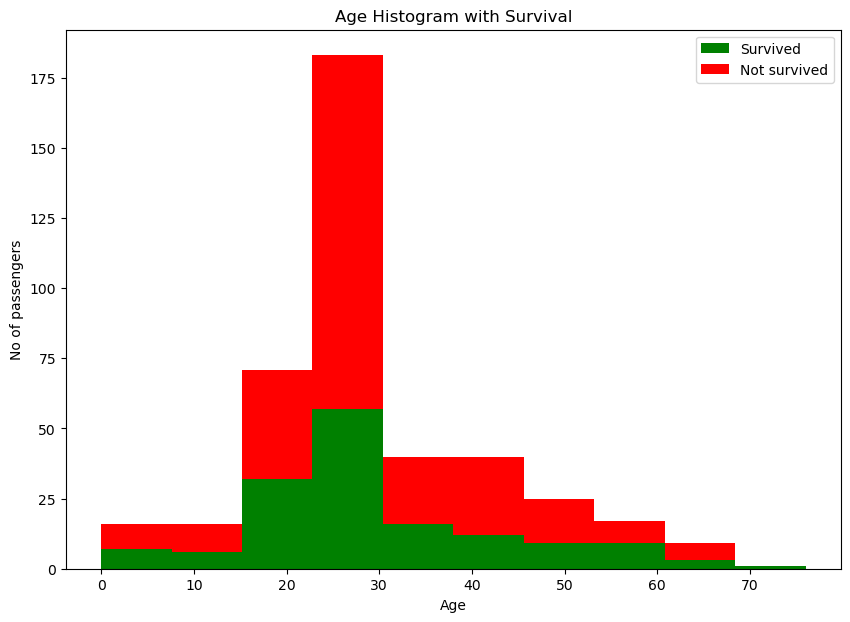

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [df[df['Survived']==1]['Age'], df[df['Survived']==0]['Age']],stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Age Histogram with Survival')
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.legend()

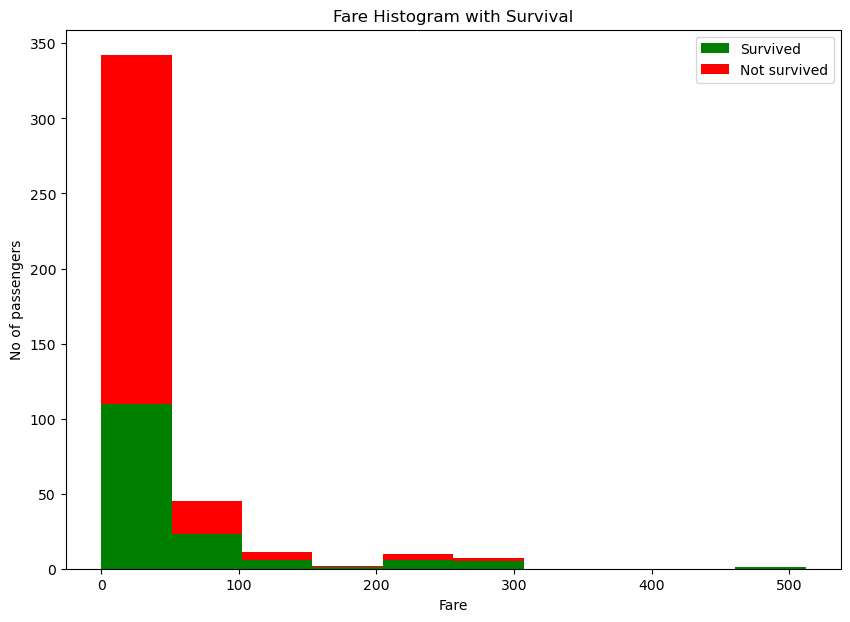

In [18]:
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [df[df['Survived']==1]['Fare'], df[df['Survived']==0]['Fare']], stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Fare Histogram with Survival')
plt.xlabel('Fare')
plt.ylabel('No of passengers')
plt.legend()

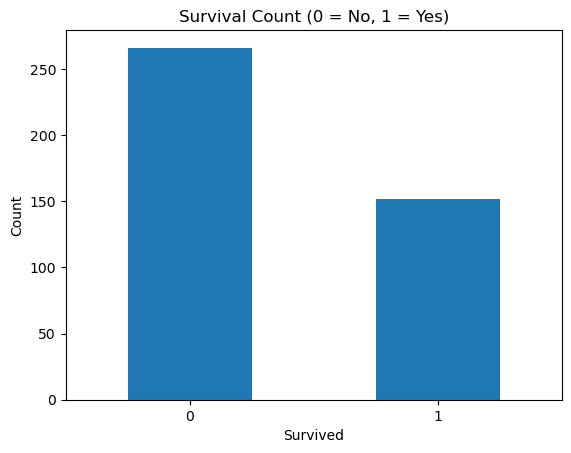

In [19]:
column = 'Survived'

# Create a bar chart
survival_counts = df[column].value_counts()
survival_counts.plot(kind='bar', rot=0)

# Adding labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count (0 = No, 1 = Yes)')

# Show the plot
plt.show()

<h1 style="border:3px solid darkred; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:darkred;font-weight:bold; font-size:45px;">4. spliting the data</h1>


In [20]:
Train = df.drop(['Survived'], axis=1)
Test = df.iloc[:,1]
x_train, x_test, y_train, y_test = train_test_split(Train, Test, test_size = 0.2, random_state = 1)

<h1 style="border:3px solid darkred; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:darkred;font-weight:bold; font-size:45px;">5.Model Building</h1>


In [21]:
LR = LogisticRegression(solver='liblinear', max_iter=200)
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic regression accuracy: {:.2f}%'.format(LRAcc*100))

Logistic regression accuracy: 92.86%
